In [ ]:
%cd /content/drive/MyDrive/detectron

/content/drive/MyDrive/detectron


# Install detectron2

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

# Training Data

In [ ]:
!ls /content/drive/MyDrive/sia/train/images | wc -l

1748


In [ ]:
# coco 데이터셋에 sia 객체 instance를 추가해준다.
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sia_train", {}, "/content/drive/Shareddrives/해커톤/coco_format/traincoco.json", "/content/drive/MyDrive/sia/train/images")
sia_metadata = MetadataCatalog.get("sia_train")
dataset_dicts = DatasetCatalog.get("sia_train")

[12/11 12:07:46 d2.data.datasets.coco]: Loading /content/drive/Shareddrives/해커톤/coco_format/traincoco.json takes 5.47 seconds.
[12/11 12:07:46 d2.data.datasets.coco]: Loaded 1748 images in COCO format from /content/drive/Shareddrives/해커톤/coco_format/traincoco.json


In [ ]:
# 정의한 sia_metadata 확인
print(sia_metadata)
print(DatasetCatalog.get("sia_train"))

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/sia/train/images', json_file='/content/drive/Shareddrives/해커톤/coco_format/traincoco.json', name='sia_train', thing_classes=['small ship', 'large ship', 'civilian aircraft', 'military aircraft', 'small car', 'bus', 'truck', 'train', 'crane', 'bridge', 'oil tank', 'dam', 'indoor playground', 'outdoor playground', 'helipad', 'roundabout', 'helicopter', 'individual container', 'grouped container', 'swimming pool', 'etc'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20})
[12/11 12:07:53 d2.data.datasets.coco]: Loading /content/drive/Shareddrives/해커톤/coco_format/traincoco.json takes 4.56 seconds.
[12/11 12:07:53 d2.data.datasets.coco]: Loaded 1748 images in COCO format from /content/drive/Shareddrives/해커톤/coco_format/traincoco.json


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Validation Data

In [ ]:
!ls /content/drive/MyDrive/sia/val/images/*.png | wc -l

220


In [ ]:
# coco 데이터셋에 sia 객체 instance를 추가해준다.
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sia_val", {}, "/content/drive/Shareddrives/해커톤/coco_format/valcoco.json", "/content/drive/MyDrive/sia/val/images/*.png")
sia_val_metadata = MetadataCatalog.get("sia_val")
dataset_dicts = DatasetCatalog.get("sia_val")

[12/11 06:19:18 d2.data.datasets.coco]: Loaded 220 images in COCO format from /content/drive/Shareddrives/해커톤/coco_format/valcoco.json


In [ ]:
# 정의한 sia_val metadata 확인
print(sia_val_metadata)
print(DatasetCatalog.get("sia_val"))

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/sia/val/images/*.png', json_file='/content/drive/Shareddrives/해커톤/coco_format/valcoco.json', name='sia_val', thing_classes=['small ship', 'large ship', 'civilian aircraft', 'military aircraft', 'small car', 'bus', 'truck', 'train', 'crane', 'bridge', 'oil tank', 'dam', 'indoor playground', 'outdoor playground', 'helipad', 'roundabout', 'helicopter', 'individual container', 'grouped container', 'swimming pool', 'etc'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20})
[12/11 06:19:19 d2.data.datasets.coco]: Loaded 220 images in COCO format from /content/drive/Shareddrives/해커톤/coco_format/valcoco.json


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Data Check

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):

    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sia_metadata, scale=1.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# COCO Object Detection Baselines
[링크](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

num_gpu = 1
bs = (num_gpu * 2)

cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/detectron/detectron2/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("sia_train",) # 위에서 정의한 train dataset 변수
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_101_FPN_3x/190397697/model_final_971ab9.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1 # 한번 배치할때 사용할 이미지
cfg.SOLVER.BASE_LR = 0.02 * bs / 16
cfg.SOLVER.MAX_ITER = 1000 # epoch대신 iteration으로 학습기간을 정함
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 21  # 21 classes
cfg.MODEL.RETINANET.NUM_CLASSES = 21  # Retinanet용 class 개수 지정


Loading config /content/drive/MyDrive/detectron/detectron2/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


# Training

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False) # 첫번째 학습 후에 학습을 좀더 하고싶을 때 True
trainer.train()

[12/11 12:07:59 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

KeyboardInterrupt: ignored

# GDAL로 Large Image 불러오기

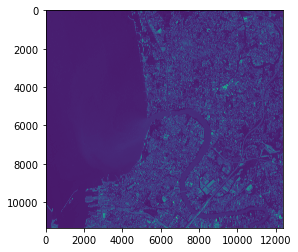

In [ ]:
import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('/content/drive/Shareddrives/해커톤/5_big_image/modu_large.tif', gdal.GA_ReadOnly)
# Note GetRasterBand() Takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

# Large Image 전처리
* 16bit -> 8bit
* RasterBand로 이뤄진 데이터 -> array 변환 -> 하나의 이미지로 merge

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import cv2
import numpy as np

dataset = gdal.Open('/content/drive/Shareddrives/해커톤/5_big_image/modu_large.tif', gdal.GA_ReadOnly)

band1 = dataset.GetRasterBand(1)
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)
arr1 = band1.ReadAsArray()
arr2 = band2.ReadAsArray()
arr3 = band3.ReadAsArray()

img = cv2.merge((arr1, arr2, arr3))

# uint16 -> uint8 [scale transpose to 0~255]
img_8 = cv2.convertScaleAbs(img, alpha=(255.0/16383.0))

plt.figure(figsize=(20,20))
plt.imshow(img_8)

# Large Image Predict

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set the testing threshold for this model
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5 # Retinanet으로 학습한 객체 score threshold
cfg.TEST.DETECTIONS_PER_IMAGE = 300
cfg.DATASETS.TEST = ('a', )
predictor = DefaultPredictor(cfg)

In [ ]:
def CROPnPREDICT(image, w, h, csv_name):
  s_h = 80 # image.shape[0] % h
  s_w = 74 # image.shape[1] % w

  for i in range(11):
    for j in range(12):
      cropped_image = image[s_h:s_h+h, s_w:s_w+w]
      predicted_image = predictor(cropped_image)
      make_CSV(predicted_image, i, j, csv_name)
      v = Visualizer(cropped_image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0) # scale값을 조절해 메모리 사용량을 줄일 수 있다.
      v = v.draw_instance_predictions(predicted_image['instances'].to('cpu'))
      cv2.imwrite(f'/content/drive/MyDrive/Crop/{i}_{j}.png', v.get_image()[:, :, ::-1])
      s_w += w
    s_w = image.shape[1] % w
    s_h += h
  return predicted_image

def make_CSV(predicted_image,i,j, csv_name):
  idex_csv = 1
  objs_info_images = []
  objs_info_images.append([])

  # for image in images:
  # image 가져오고 output 계산하기
  object_num = predicted_image['instances'].get_fields()['scores'].shape[0]

  for k in range(object_num):
    obj_info = []

    image_name = f'{i}_{j}.png'
    obj_info.append(image_name)

    obj_info.append(predicted_image['instances'].get_fields()['pred_classes'].cpu().numpy()[k]+1)
    obj_info.append(predicted_image['instances'].get_fields()['scores'].cpu().numpy()[k])

    objs_info_images.append(obj_info)
    print("[ image : %s / %d 번째 객체정보 입력완료 /  csv idex = %d ] "%(image_name, k, idex_csv))
    idex_csv += 1
  with open(csv_name, 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(objs_info_images)

def MERGE(PATH):
  for i in range(11):
      if i==0:
          for j in range(12):
              if j==0:
                  concat_img = cv2.imread(f'/content/drive/MyDrive/Crop/0_0.png')
              else:
                  temp = cv2.imread(f'/content/drive/MyDrive/Crop/0_{j}.png')
                  concat_img = cv2.hconcat([concat_img,temp])
      else:
          for j in range(12):
              if j==0:
                  h_img = cv2.imread(f'/content/drive/MyDrive/Crop/{i}_0.png')
              else:
                  temp = cv2.imread(f'/content/drive/MyDrive/Crop/{i}_{j}.png')
                  h_img = cv2.hconcat([h_img,temp])

          concat_img = cv2.vconcat([concat_img,h_img])
  return concat_img

In [ ]:
# 객체 정보를 저장할 csv파일 만들기
import csv
csv_name = './big_image_final_250000.csv'
with open(csv_name, 'w', newline='') as f:
  writer = csv.writer(f)

In [ ]:
# 예측 시작
from detectron2.utils.visualizer import ColorMode
w, h = 1024, 1024 # Patch size 지정

a = CROPnPREDICT(img_8, w, h, csv_name)
merged_image = MERGE('/content/drive/MyDrive/Crop')

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[ image : 0_4.png / 0 번째 객체정보 입력완료 /  csv idex = 1 ] 
[ image : 0_4.png / 1 번째 객체정보 입력완료 /  csv idex = 2 ] 
[ image : 0_4.png / 2 번째 객체정보 입력완료 /  csv idex = 3 ] 
[ image : 0_4.png / 3 번째 객체정보 입력완료 /  csv idex = 4 ] 
[ image : 0_4.png / 4 번째 객체정보 입력완료 /  csv idex = 5 ] 
[ image : 0_4.png / 5 번째 객체정보 입력완료 /  csv idex = 6 ] 
[ image : 0_5.png / 0 번째 객체정보 입력완료 /  csv idex = 1 ] 
[ image : 0_5.png / 1 번째 객체정보 입력완료 /  csv idex = 2 ] 
[ image : 0_5.png / 2 번째 객체정보 입력완료 /  csv idex = 3 ] 
[ image : 0_5.png / 3 번째 객체정보 입력완료 /  csv idex = 4 ] 
[ image : 0_5.png / 4 번째 객체정보 입력완료 /  csv idex = 5 ] 
[ image : 0_6.png / 0 번째 객체정보 입력완료 /  csv idex = 1 ] 
[ image : 0_7.png / 0 번째 객체정보 입력완료 /  csv idex = 1 ] 
[ image : 0_7.png / 1 번째 객체정보 입력완료 /  csv idex = 2 ] 
[ image : 0_7.png / 2 번째 객체정보 입력완료 /  csv idex = 3 ] 
[ image : 0_7.png / 3 번째 객체정보 입력완료 /  csv idex = 4 ] 
[ image : 0_7.png / 4 번째 객체정보 입력완료 /  csv idex = 5 ] 
[ image : 0_8.png / 0 번째 객체정보 입력완료 /  csv idex = 1 ] 
[ image : 0_8.png / 1 번째 객체정

# Predicted Result

In [ ]:
# 병합한 big image 확인
plt.figure(figsize=(20,20))
plt.imshow(merged_image)

Output hidden; open in https://colab.research.google.com to view.

# Visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/detectron/big_image_final_250000.csv')

df = pd.DataFrame(data)
df = df.dropna(axis=0)
print(df.shape)
df.head(20)

(5438, 3)


,0_4.png,2,0.95186615
0,0_4.png,5,0.890887
1,0_4.png,5,0.889924
2,0_4.png,5,0.878649
3,0_4.png,5,0.872207
4,0_4.png,5,0.768583
5,0_4.png,1,0.762600
6,0_4.png,2,0.759553
7,0_4.png,1,0.736820
8,0_4.png,1,0.714595
9,0_4.png,1,0.690531


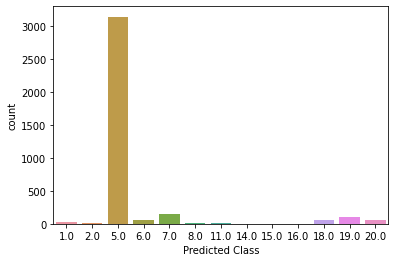

In [ ]:
sns.countplot(x = 'Predicted Class', data = df)

In [ ]:
df_object = df['Predicted Class'].value_counts().to_frame(name='a')
df_object

,a
5.0,3146
7.0,146
19.0,97
18.0,62
20.0,52
6.0,52
1.0,30
11.0,14
2.0,14
8.0,13


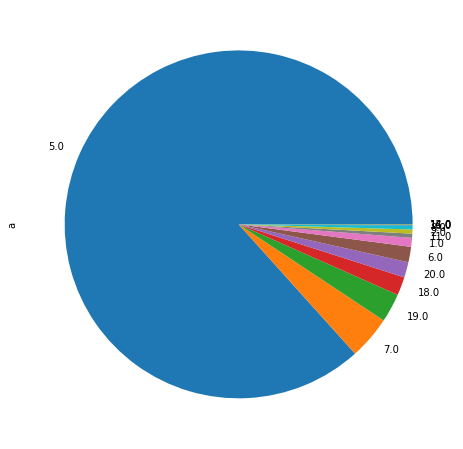

In [ ]:
plt.figure(figsize=(8,8))
df_object['a'].plot.pie()